# **About the dataset**

This dataset was obtained from the [Our World In Data](https://github.com/owid/co2-data), a non-governmental organization (NGO) that aims to provide a wide range of insights regarding several world problems.

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import urllib.request
import upsetplot

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to display matplotlib figures in a jupyter notebook
%matplotlib inline

# Making plots pretty
sns.set_style("darkgrid")

## **Reading the data**

In [2]:
# Data set url
owid_co2_data_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"

In [3]:
# Downloading data from url into ./data/ directory
urllib.request.urlretrieve(
    url = owid_co2_data_url,
    filename = "./data/owid-co2-data.csv"
)

('./data/owid-co2-data.csv', <http.client.HTTPMessage at 0x7f8fb03344c0>)

In [4]:
# To specify the number of rows and columns to be displayed by pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [5]:
# Reading and visualizing data set
data = pd.read_csv(
    "./data/owid-co2-data.csv",
)

data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.931,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.004,0.789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.004,0.785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117,NaN,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

Some data sets can have column names with different formats, such as upper cases, lower cases, spaces, symbols, etc. In this case, the column names have already been standardized, so there's no need to do that.

In [7]:
# Checking which features are different than float type
data.dtypes[
    data.dtypes != "float64"
]

country     object
year         int64
iso_code    object
dtype: object

All the columns are float type objects except **`'country'`**, **`'year'`** and **`'iso_code'`** which are differents.

## **Using Pandas API extension for EDA**

### **Missing values**

In [39]:
co2_df = data.copy()

In [40]:
%run pd-extensions.ipynb

In [13]:
# Total number of missing values
co2_df.explore.number_missing()

1949361

In [14]:
# Total number of complete values
co2_df.explore.number_complete()

1493341

In [15]:
# Missing values per variable
co2_df.explore.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,country,0,46523,0.00
1,year,0,46523,0.00
2,iso_code,6661,46523,14.32
3,population,7949,46523,17.09
4,gdp,31972,46523,68.72
5,cement_co2,21549,46523,46.32
6,cement_co2_per_capita,23809,46523,51.18
7,co2,15174,46523,32.62
8,co2_growth_abs,17579,46523,37.79
9,co2_growth_prct,21491,46523,46.19


In [18]:
# Analysis of missing values per observations
co2_df.explore.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,65,11328,24.349247
1,23,3266,7.020184
2,18,2492,5.356490
3,5,2186,4.698751
4,64,2116,4.548288
5,67,2111,4.537541
6,26,1774,3.813168
7,28,1700,3.654107
8,71,1551,3.333835
9,25,1277,2.744879


In [20]:
# Checking total and % of missing values for a specific variable every row span
co2_df.explore.missing_variable_span(variable="co2", span_every=3000)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,982,2018,32.733333,67.266667
1,1,906,2094,30.200000,69.800000
2,2,928,2072,30.933333,69.066667
3,3,1208,1792,40.266667,59.733333
4,4,680,2320,22.666667,77.333333
5,5,950,2050,31.666667,68.333333
6,6,953,2047,31.766667,68.233333
7,7,1297,1703,43.233333,56.766667
8,8,681,2319,22.700000,77.300000
9,9,1305,1695,43.500000,56.500000


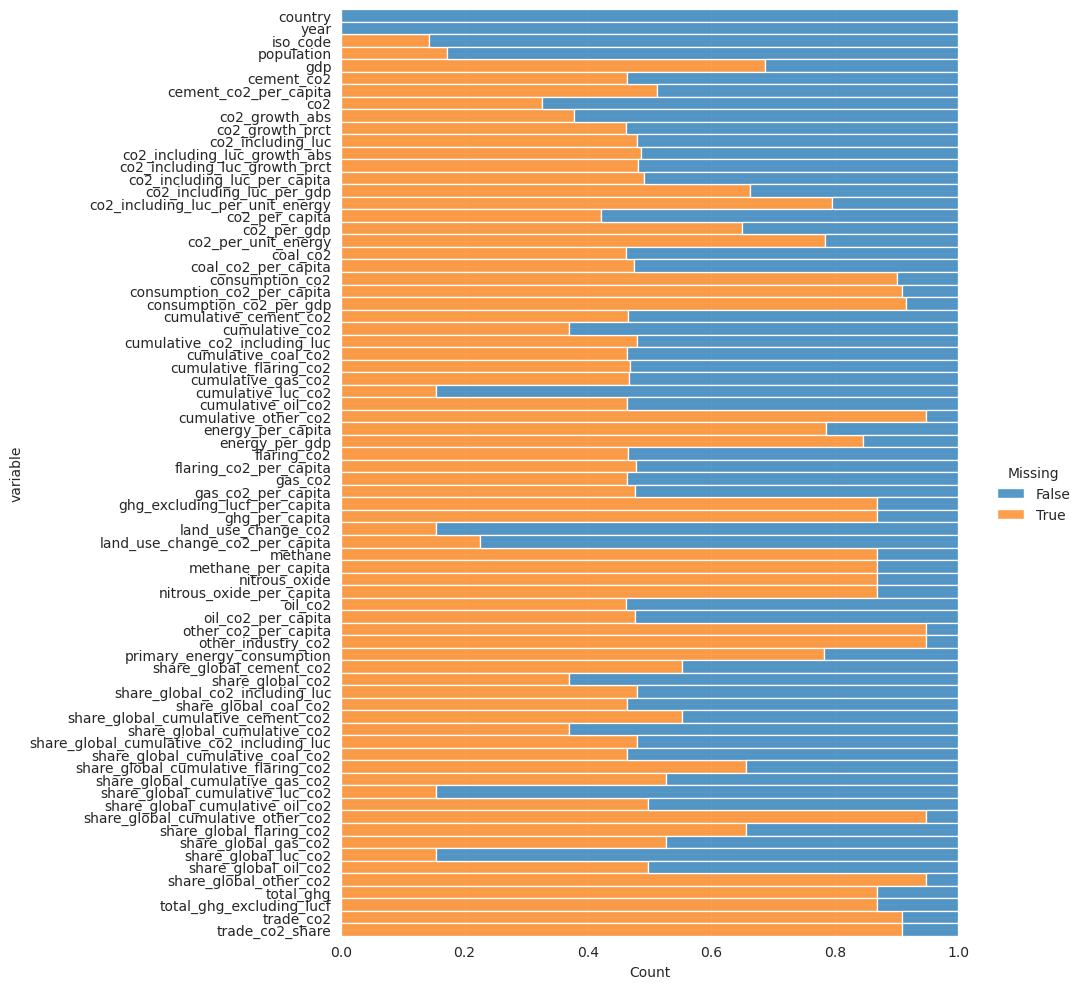

In [26]:
co2_df.explore.missing_variable_plot()

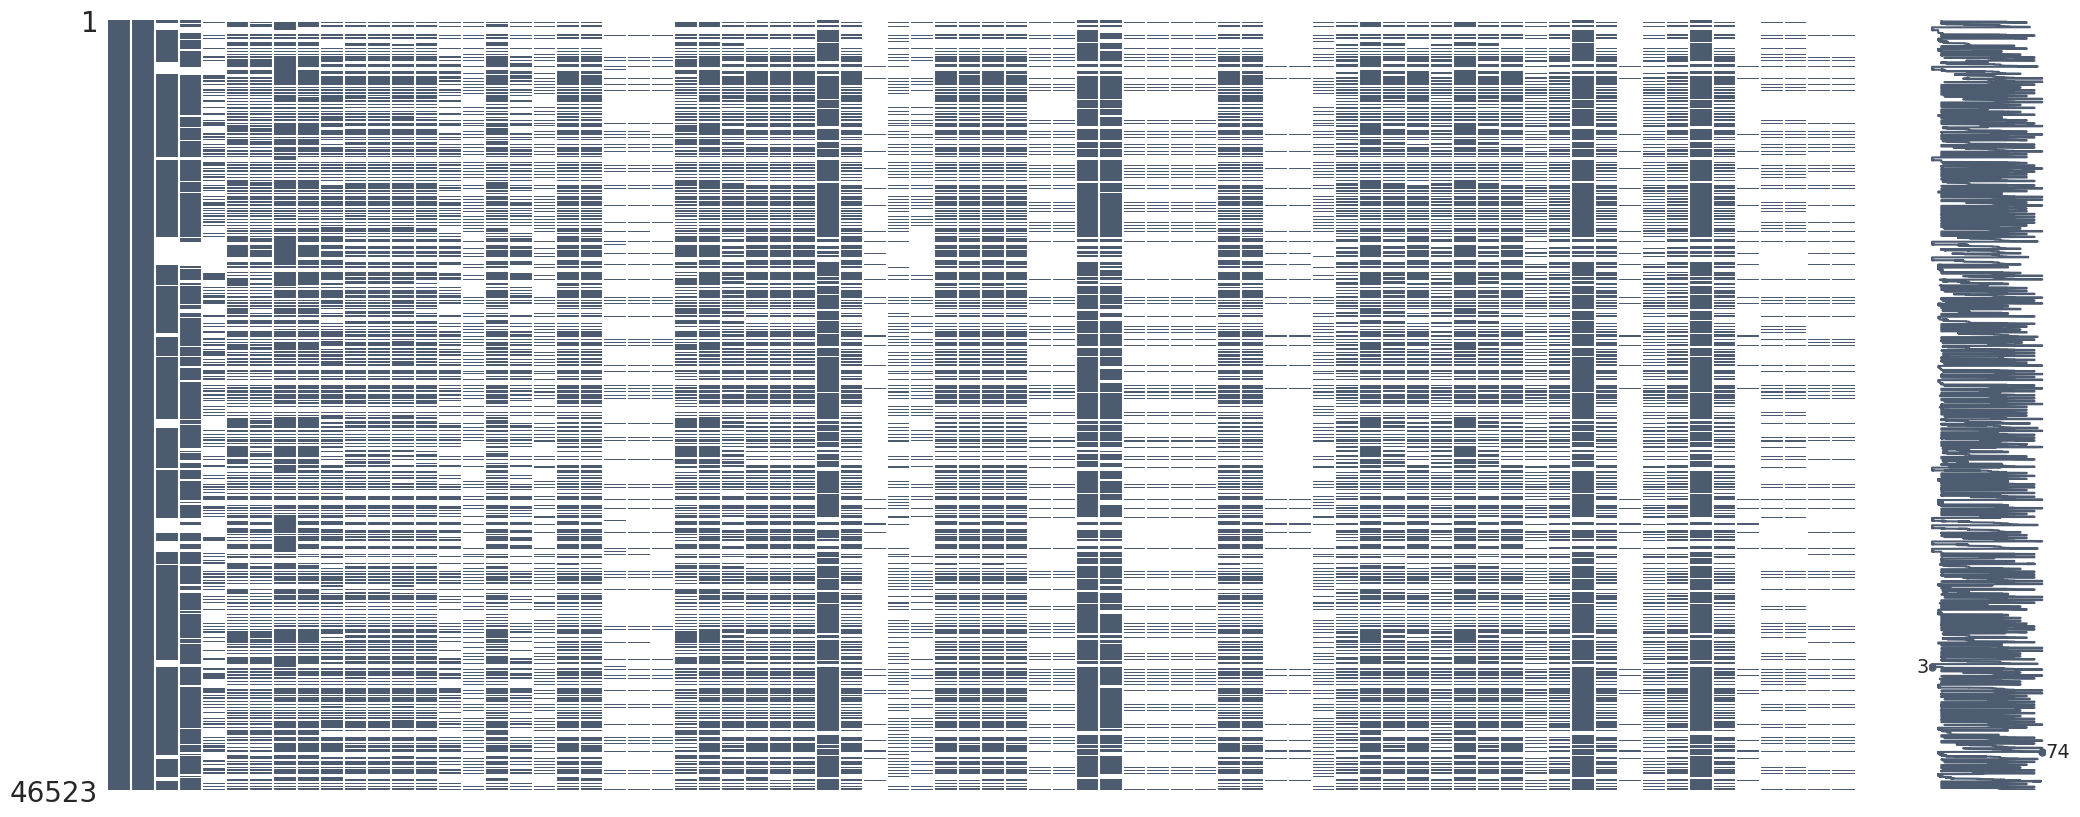

In [33]:
co2_df.explore.missing_variable_plot_matrix()

There are many columns practically empty. Hence, for the purposes of this project, some columns will be deleted.

In [41]:
columns_to_delete = [
    'co2_including_luc', 'co2_including_luc_growth_abs',
    'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
    'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
    'consumption_co2',
    'consumption_co2_per_capita',
    'consumption_co2_per_gdp',
    'cumulative_co2_including_luc',
    'cumulative_luc_co2',
    'flaring_co2',
    'flaring_co2_per_capita',
    'ghg_excluding_lucf_per_capita',
    'ghg_per_capita',
    'methane',
    'methane_per_capita',
    'nitrous_oxide',
    'nitrous_oxide_per_capita',
    'land_use_change_co2',
    'land_use_change_co2_per_capita',
    'share_global_co2_including_luc',
    'share_global_cumulative_co2_including_luc',
    'share_global_cumulative_flaring_co2',
    'share_global_cumulative_luc_co2',
    'share_global_luc_co2',
    'total_ghg',
    'total_ghg_excluding_lucf',
    'trade_co2',
    'trade_co2_share'
]

co2_df.drop(
    columns = columns_to_delete,
    axis = 1,
    inplace = True
)

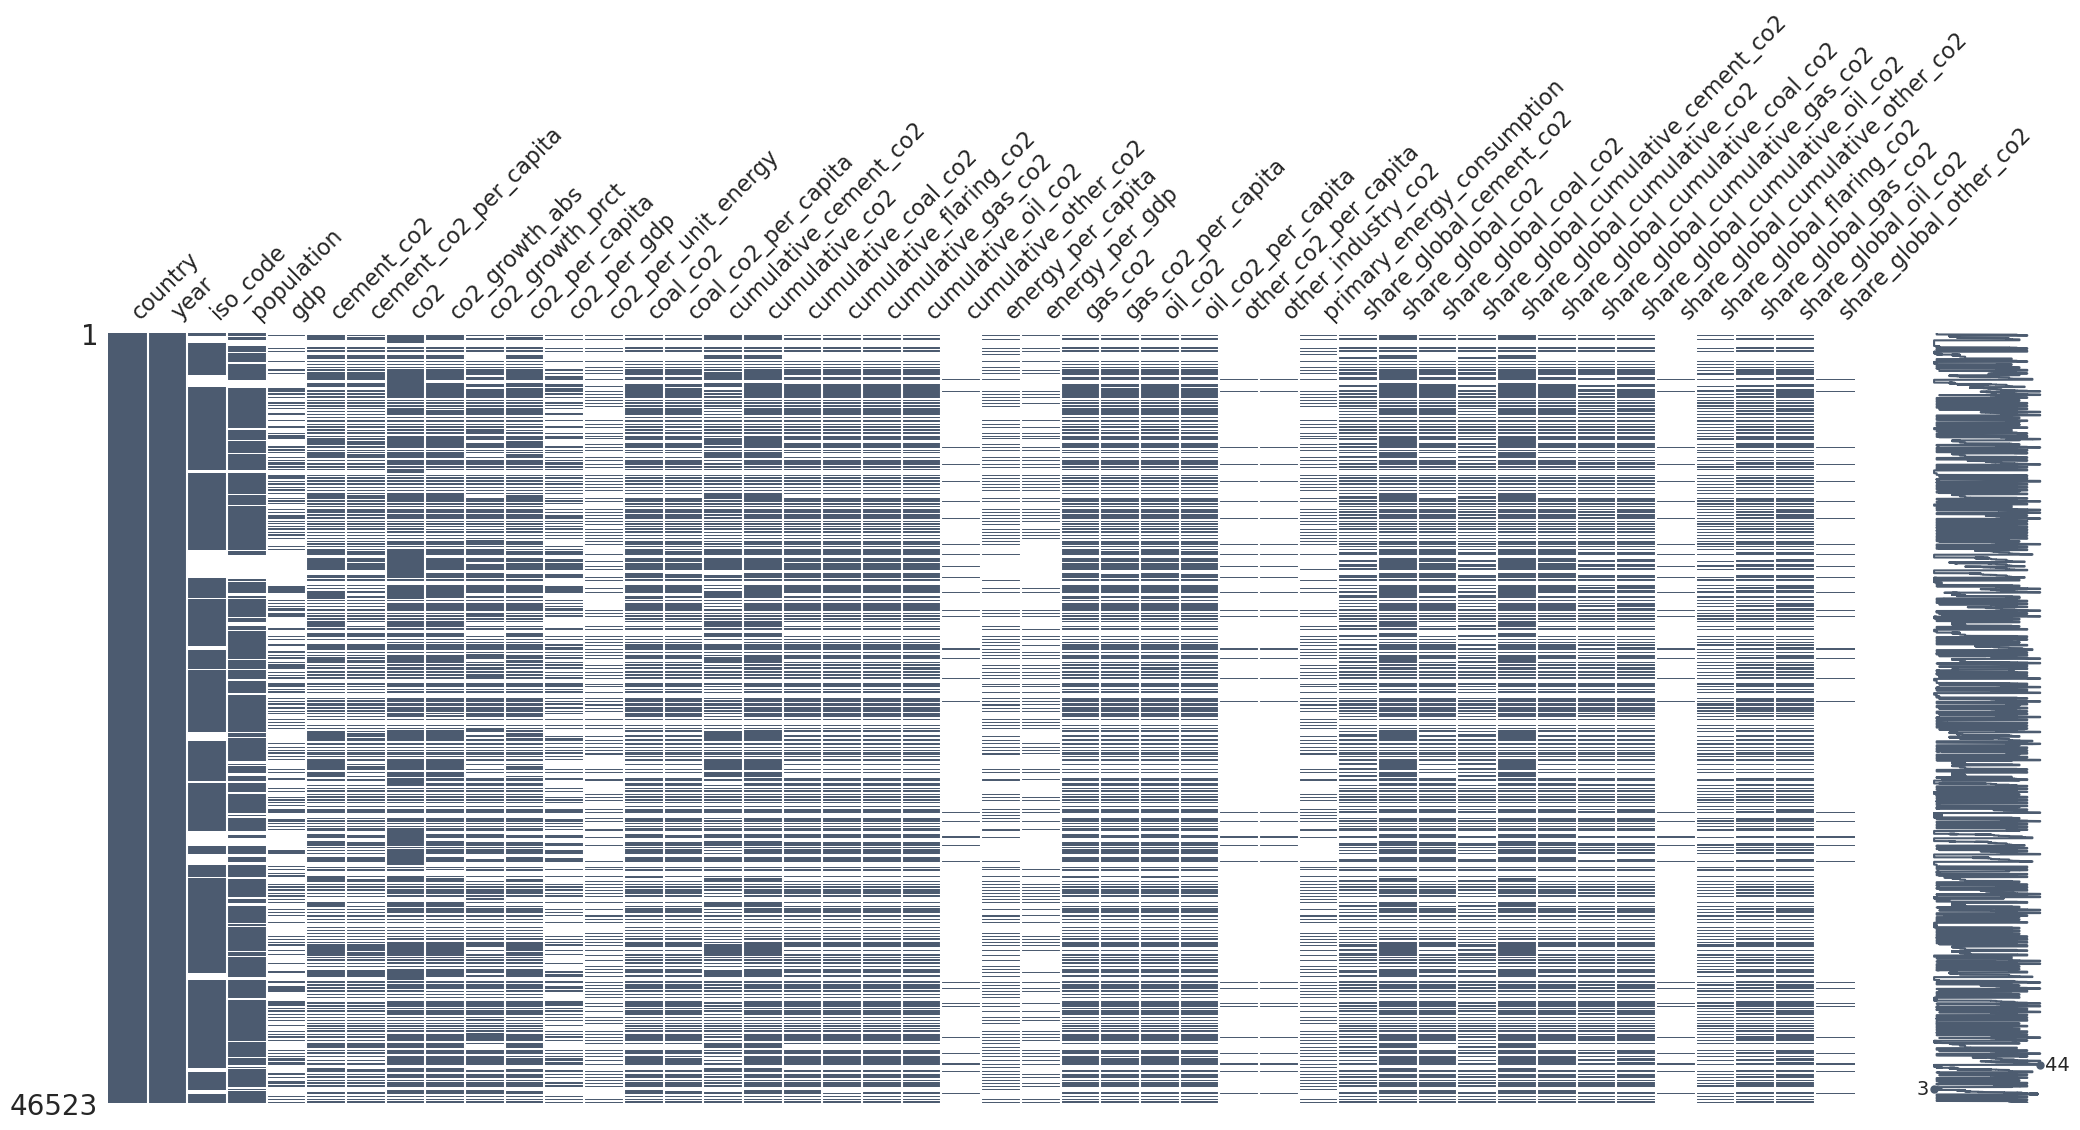

In [42]:
co2_df.explore.missing_variable_plot_matrix()

# **Data Pre-processing**

### **Year column**

In [ ]:
# Checking minimum and maximum year
print("min year:", df["year"].min())
print("max year:", df["year"].max())

In [ ]:
# Checking missing values in the year column
df["year"].isnull().sum()

No missing values in the year column.

In [ ]:
# Removing entries dated before 1900's. Analysis will be made from the beginning of the 20th century.
df = df[
    df["year"] >= 1900
]

In [ ]:
years = df["year"].unique()
years.sort()
years

### **ISO code column**

In [ ]:
# Checking countries without an ISO code
df[df["iso_code"].isnull()]["country"].unique()

In [ ]:
countries_to_delete = [
    'French Equatorial Africa',
    'French West Africa',
    'Kosovo',
    'Kuwaiti Oil Fires',
    'Leeward Islands',
    'Panama Canal Zone',
    'Ryukyu Islands',
    'St. Kitts-Nevis-Anguilla',
    'Bonaire Sint Eustatius and Saba',
    'Christmas Island',
    'Sint Maarten (Dutch part)',
    'Europe (excl. EU-27)',
    'Europe (excl. EU-28)',
    'International transport'
]

# Checking the amount of CO2 emitted for each country without a designated ISO code.
for country in countries_to_delete:
    co2 = df[
        (df["country"] == country) & ~(df["co2"].isnull())
    ]["co2"].sum()
    print(f"CO2 Emssions: {country} = {np.round(co2, 3)}")

These countries have a small amount of CO2 emissions observations to be considered as relevant for the purposes of this project. Therefore, their entries will be deleted for simplification.

In [ ]:
# Dropping the countries
for country in countries_to_delete:
    value = df[
        df["country"] == country
    ].index
    
    df.drop(
        labels = value,
        axis = 0,
        inplace = True
    )

In [ ]:
# Verifying the countries were dropped
df[df["iso_code"].isnull()]["country"].unique()

This way, the project will only consider the non-iso code "countries" observations such as the continents', the "World", and those corresponding to the income classification.

### **CO2 Emissions column**

In [ ]:
# Dropping NaN's in co2 column
df.drop(
    labels = df[df["co2"].isnull()].index,
    axis = 0,
    inplace = True
)

# Dropping NaN's in co2_per_capita column
df.drop(
    labels = df[df["co2_per_capita"].isnull()].index,
    axis = 0,
    inplace = True
)

In [ ]:
msno.matrix(
    df,
    color = (0.3, 0.36, 0.44)
)

### **GDP column**

In [ ]:
# Filling GDP missing values for countries with co2 and co2_per_gdp entries.
df["gdp"].fillna(
    df["co2"] / df["co2_per_gdp"],
    inplace = True
)

In [ ]:
df.groupby(["country"], as_index=False)["gdp"].apply(lambda x: x.isnull().sum())

# **Exploratory Data Analysis**

### **1. Yearly world CO2 emissions.**

In [ ]:
world_emissions = df[df["country"] == "World"][["year", "co2"]]

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
    x = world_emissions["year"],
    y = world_emissions["co2"]
    )
)

fig.update_layout(
    title = "Yearly global CO2 emissions",
    xaxis_title = "Year",
    yaxis_title = "CO2 Emissions [Million metric-tons]"
)

# fig = px.line(world_emissions, x="year", y="co2", labels={"x": "Year", "y": "CO2 Emissions [1e6 metric-tons]"}, title="Yearly global CO2 emissions")
fig.show()

### **2. CO2 emissions by continent.**

In [ ]:
emissions_by_continent = df[
    (df["country"] == "North America") |
    (df["country"] == "North America (excl. USA)") |
    (df["country"] == "South America") |
    (df["country"] == "Africa") |
    (df["country"] == "Europe") | 
    (df["country"] == "Asia") |
    (df["country"] == "Asia (excl. China & India)") |
    (df["country"] == "Oceania")
][
    df["year"] == 2020
][
    ["country", "co2"]
].sort_values(
    by = "co2",
    ascending = False
)

fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize = (12, 6)
)

sns.barplot(
    emissions_by_continent,
    x = emissions_by_continent["country"],
    y = emissions_by_continent["co2"],
    ax = axes[0]
)

axes[0].set_xlabel(
    "Country",
    fontweight = "bold"
)

axes[0].set_xticklabels(
    labels = emissions_by_continent["country"],
    rotation = 90
)

axes[0].set_ylabel(
    "CO2 Emissions [1e6 metric-tons]",
    fontweight = "bold"
)

plt.pie(
    emissions_by_continent["co2"],
    labels = emissions_by_continent["country"],
    autopct = '%.0f%%',
    explode = (0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
)

fig.suptitle(
    'CO2 Emissions per continent [2020]',
    fontsize = 20,
    fontweight = "bold"
)

plt.tight_layout()
plt.show()

### **2. Yearly CO2 emissions by continent.**

In [ ]:
continent_yearly_emissions = df[
    (df["country"] == "North America") |
    (df["country"] == "North America (excl. USA)") |
    (df["country"] == "South America") |
    (df["country"] == "Africa") |
    (df["country"] == "Europe") | 
    (df["country"] == "Asia") |
    (df["country"] == "Asia (excl. China & India)") |
    (df["country"] == "Oceania")
][
    ["country", "year", "co2"]
]

sns.lineplot(
    data = continent_yearly_emissions,
    x = continent_yearly_emissions["year"],
    y = continent_yearly_emissions["co2"],
    hue = continent_yearly_emissions["country"]
)

plt.title(
    "Continent's Yearly CO2 emissions",
    fontweight = "bold",
    fontsize = 16
)

plt.xlabel("Year", weight = "bold")
plt.ylabel("CO2 Emissions [1e6 metric-tons]", weight = "bold")

plt.legend(bbox_to_anchor = (1.05, 1))

plt.show()

### **3. Top 10 countries with most CO2 emissions in 2020.**

In [ ]:
df_2 = df.copy()

# Removing non-iso countries
non_iso_countries = list(df_2[df_2["iso_code"].isnull()]["country"].unique())
for country in non_iso_countries:
    value = df_2[df_2["country"] == country].index
    df_2.drop(labels=value, axis=0, inplace=True)

In [ ]:
top_10_co2 = df_2[df_2["year"] == 2020][["country", "iso_code", "co2"]].sort_values(by="co2", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_co2, x=top_10_co2["country"], y=top_10_co2["co2"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_co2["country"], rotation=90)
axes[0].set_ylabel("CO2 Emissions [1e6 metric-tons]", fontweight="bold")
plt.pie(top_10_co2["co2"], labels=top_10_co2["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_co2["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 Countries With Most CO2 Emissions [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **3. Top 10 countries with most CO2 emissions per capita in 2020.**

In [ ]:
top_10_per_capita = df_2[df_2["year"] == 2020][["country", "co2_per_capita"]].sort_values(by="co2_per_capita", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_per_capita, x=top_10_per_capita["country"], y=top_10_per_capita["co2_per_capita"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_per_capita["country"], rotation=90)
axes[0].set_ylabel("CO2 Emissions per capita [1e6 metric-tons]", fontweight="bold")
plt.pie(top_10_per_capita["co2_per_capita"], labels=top_10_per_capita["country"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
fig.suptitle('Top 10 Countries With Most CO2 Emissions per capita [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **4. Top 10 countries by Gross Domestic Product (GDP)**

In [ ]:
top_10_gdp = df_2[df_2["year"] == 2018][["country", "iso_code", "gdp"]].sort_values(by="gdp", ascending=False).head(10)
# GDP data has only been recorded until 2018

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_gdp, x=top_10_gdp["country"], y=top_10_gdp["gdp"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_gdp["country"], rotation=90)
axes[0].set_ylabel("GDP [Trillion USD]", fontweight="bold")
plt.pie(top_10_gdp["gdp"], labels=top_10_gdp["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_gdp["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 countries by GDP [2018]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **5. Top 10 richest countries yearly CO2 emissions**

In [ ]:
top_10_co2_growth = df[df["country"].isin(list(top_10_gdp["country"]))][["country", "year", "iso_code", "gdp", "co2", "co2_growth_prct"]].sort_values(by="co2", ascending=False)

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_co2_growth, x=top_10_co2_growth["year"], y=top_10_co2_growth["co2"], hue=top_10_co2_growth["country"])
plt.title("Yearly CO2 emissions [Top 10 richest countries]", fontweight="bold", fontsize=16)
plt.xlabel("Year", weight="bold")
plt.ylabel("CO2 Emissions per capita [1e6 metric-tons]", weight="bold")
plt.legend()
plt.show()

### **5. Top 10 most energy consuming countries.**

In [ ]:
top_10_energy = df_2[df_2["year"] == 2020][["country", "iso_code", "primary_energy_consumption"]].sort_values(by="primary_energy_consumption", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_energy, x=top_10_energy["country"], y=top_10_energy["primary_energy_consumption"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_energy["country"], rotation=90)
axes[0].set_ylabel("Primary Energy Consumption [TWh/yr]", fontweight="bold")
plt.pie(top_10_energy["primary_energy_consumption"], labels=top_10_energy["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_energy["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 Most Energy Consumers [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **6. Top 10 most energy consuming countries per capita.**

In [ ]:
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2']

In [ ]:
emissions_per_activity = data[(data["country"] == "World") & (data["year"] == 2020)][["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2"]]
emissions_per_activity.reset_index(inplace=True)
emissions_per_activity.drop(columns="index", inplace=True)
emissions_per_activity = emissions_per_activity.T
emissions_per_activity
# sns.barplot(emissions_per_activity)
#plt.pie(top_10_energy["primary_energy_consumption"], labels=top_10_energy["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
# plt.pie(emissions_per_activity.index, labels=emissions_per_activity.values)
# plt.legend(top_10_energy["country"], bbox_to_anchor=(1.05, 1))

In [ ]:
plt.pie(top_10_energy["primary_energy_consumption"], labels=top_10_energy["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_energy["country"], bbox_to_anchor=(1.05, 1))